In [1]:
import pandas as pd

df = pd.read_csv('./data/mission_terbang_auto_2.csv')
df.head(4)

,time,mode,aspd,gspd,lat,lon,r,p,y,alt,...,bearing,rad,latacc,climb,srv0,srv1,srv2,srv3,lmt0,lmt1
0,1679126905688,MANU,0.79,1.00,-7.766487,110.233482,33.78,-29.74,272.43,-3.33,...,140.87,0.66,-0.68,-0.68,1500,1500,1497,1000,0.0,1.0
1,1679126905837,MANU,0.81,1.02,-7.766487,110.233482,34.46,-31.09,273.71,-3.32,...,140.87,0.66,-0.68,-0.68,1500,1500,1498,1000,0.0,1.0
2,1679126905908,MANU,0.85,1.09,-7.766487,110.233482,35.27,-30.32,273.63,-3.32,...,140.87,0.66,-0.74,-0.74,1500,1500,1497,1000,0.0,1.0
3,1679126905989,MANU,0.88,1.10,-7.766487,110.233482,34.65,-29.17,274.59,-3.32,...,140.87,0.66,-0.74,-0.74,1500,1500,1497,1000,0.0,1.0


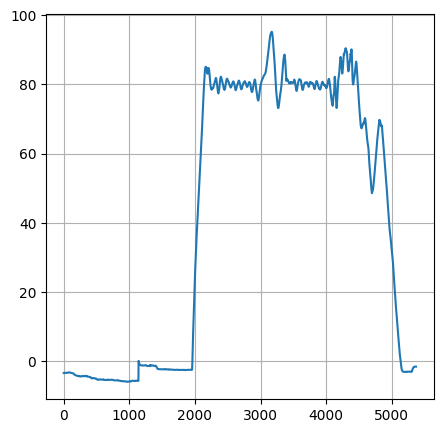

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df.alt[:])
ax.grid()

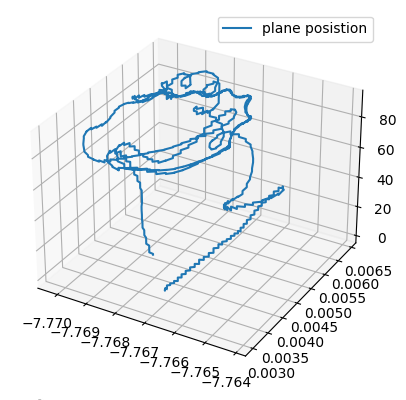

In [9]:
pos = plt.figure().add_subplot(projection='3d')
pos.plot(df.lat[2000:], df.lon[2000:], df.alt[2000:], label='plane posistion')
pos.legend()

plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df[['lat', 'lon', 'alt', 'r', 'p', 'y']]
y = df.aspd

X_tr, X_test, y_tr, y_test = train_test_split(X,y, train_size=.8)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, train_size=.75)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred)}    r2_score accuracy: {r2_score(y_val, y_pred)}')

MSE: 0.3845039155679706    r2_score accuracy: 0.9933067354574493


In [17]:
rf.fit(X, y)

RandomForestRegressor()

In [28]:
test_pred = rf.predict(X)
print(f'MSE: {mean_squared_error(y, test_pred)}    r2_score accuracy: {r2_score(y, test_pred)}')

MSE: 0.03107290504283057    r2_score accuracy: 0.9994407637821381


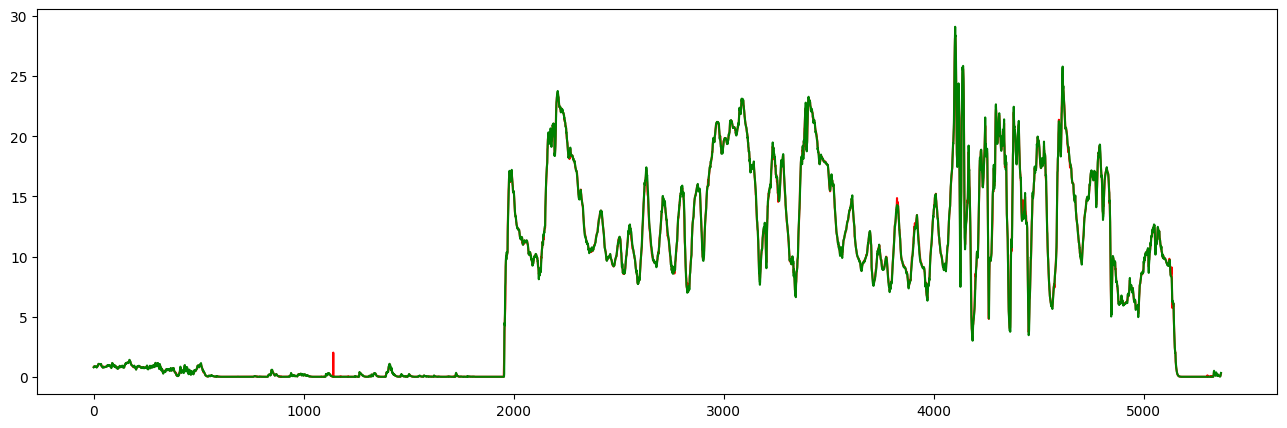

In [30]:
fig, axs = plt.subplots(figsize=(16,5))
tf = []
for i in range(len(test_pred)):
    tf.append(i)
axs.plot(tf, test_pred, c='red')
axs.plot(tf, y, c='green')